In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dirichlet

In [2]:
def dirichlet(p, q, r, y0, yf, x0, xf, h):
  N = int((xf - x0) / h)
  x = np.linspace(x0, xf, N+1)
  A = np.zeros((N-1, N-1))
  b = np.zeros(N-1)

  formula_principal = lambda x: -4 + 2 * ((h)**2) *q(x)
  formula_superior = lambda x: 2 + h * p(x)
  formula_inferior = lambda x: 2 - h * p(x)

  np.fill_diagonal(A, formula_principal(x[1:N]))
  np.fill_diagonal(A[1:], formula_superior(x[1:N]))
  np.fill_diagonal(A[:, 1:], formula_inferior(x[1:N]))

  for i in range(1, N):
    if i == 1:
      b[i-1] = 2*((h)**2)*r(x[i]) - (2 - h*p(x[i])) * y0
    elif i == N-1:
      b[i-1] = 2*((h)**2)*r(x[i]) - (2 + h*p(x[i])) * yf
    else:
      b[i-1] = 2*((h)**2)*r(x[i])

  u = np.zeros(N+1)
  u[1:N] = np.linalg.solve(A, b)
  u[0] = y0
  u[-1] = yf

  return x, u, A

Exemplo

$$f: y'' + xy' + 2y = 0$$
$$y_0 = \frac{1}{2}$$
$$y_f = 1$$
$$h = 0.2$$
$$0 \leq x \leq 1$$

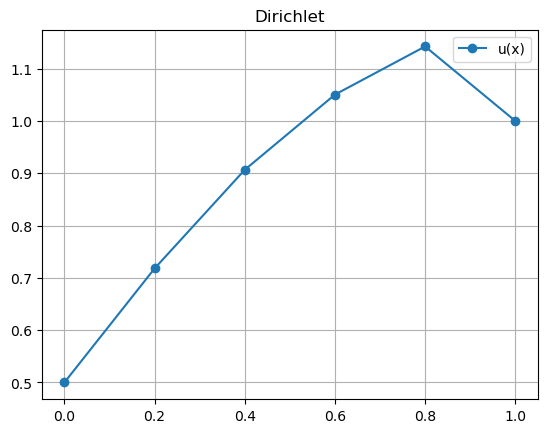

In [15]:
p = lambda x: x
q = lambda x: 2
r = lambda x: 0
y0 = 0.5
yf = 1
x0 = 0
xf = 1
h = 0.2

x, u, A = dirichlet(p, q, r, y0, yf, x0, xf, h)
plt.plot(x, u, label='u(x)', marker='o')
plt.legend()
plt.title('Dirichlet')
plt.grid()
plt.show()

# Newman

In [9]:
def newmann(p, q, r, yd0, ydf, x0, xf, h):
  N = int((xf - x0) / h)
  x = np.linspace(x0, xf, N+1)
  A = np.zeros((N-1, N-1))
  b = np.zeros(N-1)

  formula_principal = lambda x: -4 + 2 * ((h)**2) *q(x)
  formula_superior = lambda x: 2 + h * p(x)
  formula_inferior = lambda x: 2 - h * p(x)

  np.fill_diagonal(A, formula_principal(x[1:N]))
  np.fill_diagonal(A[1:], formula_superior(x[1:N]))
  np.fill_diagonal(A[:, 1:], formula_inferior(x[1:N]))

  A[0, 0] = -2 - h * p(x[1]) + 2 * ((h)**2) * q(x0)
  A[-1, -1] = -2 - h * p(x[-2]) + 2 * ((h)**2) * q(xf)

  for i in range(1, N):
    if i == 1:
      b[i-1] = 2*((h)**2)*r(x[i]) - (2 - h*p(x[i])) * yd0 * h
    elif i == N-1:
      b[i-1] = 2*((h)**2)*r(x[i]) - (2 + h*p(x[i])) * ydf * h
    else:
      b[i-1] = 2*((h)**2)*r(x[i])

  u = np.zeros(N+1)
  u[1:N] = np.linalg.solve(A, b)

  u[0] = u[1] - yd0 * h
  u[-1] = u[-2] + ydf * h

  return x, u, A

Exemplo

$$f: y'' + xy' + 2y = 0$$
$$y'_0 = \frac{1}{2}$$
$$y'_f = -1$$
$$h = 0.2$$
$$0 \leq x \leq 1$$

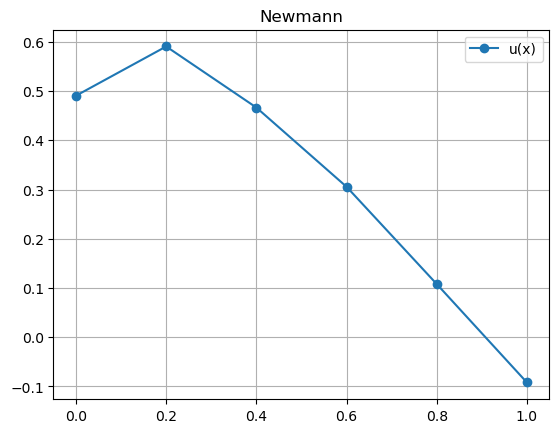

In [14]:
p = lambda x: x
q = lambda x: 2
r = lambda x: 0
yd0 = 0.5
ydf = -1
x0 = 0
xf = 1
h = 0.2

x, u, A = newmann(p, q, r, yd0, ydf, x0, xf, h)

plt.plot(x, u, label='u(x)', marker='o')
plt.legend()
plt.title('Newmann')
plt.grid()
plt.show()

# Robin

In [11]:
def robin(p, q, r, y0, yf, x0, xf, h, d):
  N = int((xf - x0) / h)
  x = np.linspace(x0, xf, N+1)
  A = np.zeros((N-1, N-1))
  b = np.zeros(N-1)

  formula_principal = lambda x: -4 + 2 * ((h)**2) *q(x)
  formula_superior = lambda x: 2 + h * p(x)
  formula_inferior = lambda x: 2 - h * p(x)

  np.fill_diagonal(A, formula_principal(x[1:N]))
  np.fill_diagonal(A[1:], formula_superior(x[1:N]))
  np.fill_diagonal(A[:, 1:], formula_inferior(x[1:N]))

  if d == 'i':
    A[0, 0] = -2 - h * p(x[1]) + 2 * ((h)**2) * q(x0)
    b[0] = 2*((h)**2)*r(x[1]) - (2 - h*p(x[1])) * y0 * h
    b[-1] = 2*((h)**2)*r(x[1]) - (2 + h*p(x[1])) * y0
  elif d == 'f':
    A[-1, -1] = -2 - h * p(x[-2]) + 2 * ((h)**2) * q(xf)
    b[0] = 2*((h)**2)*r(x[-2]) - (2 + h*p(x[-2])) * yf
    b[-1] = 2*((h)**2)*r(x[-2]) - (2 + h*p(x[-2])) * yf * h
  else:
    print("Variável 'd' inválida. Passe 'i' para derivada no início e 'f' para derivada no final.")

  for i in range(2, N-1):
    b[i-1] = 2*((h)**2)*r(x[i])

  u = np.zeros(N+1)
  u[1:N] = np.linalg.solve(A, b)

  if d == 'i':
    u[0] = u[1] - y0 * h
    u[-1] = yf
  elif d == 'f':
    u[0] = y0
    u[-1] = u[-2] + yf * h

  return x, u, A

Exemplo

$$f: y'' + xy' + 2y = 0$$
$$y_0 = \frac{1}{2}$$
$$y'_f = -1$$
$$h = 0.2$$
$$0 \leq x \leq 1$$

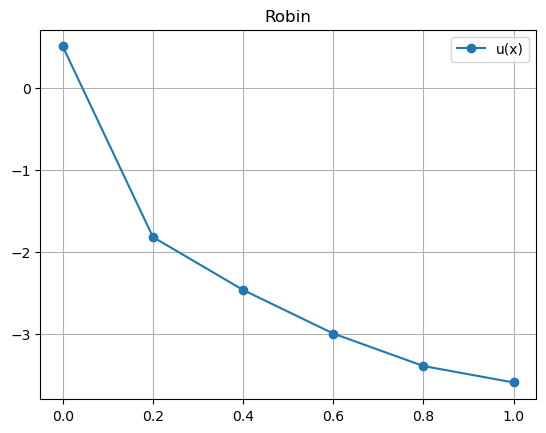

In [13]:
# f : y" + xy' 2y = 0
p = lambda x: x
q = lambda x: 2
r = lambda x: 0
y0 = 0.5
yf = -1
x0 = 0
xf = 1
h = 0.2
d = 'f'

x, u, A = robin(p, q, r, y0, yf, x0, xf, h, d)

plt.plot(x, u, label='u(x)', marker='o')
plt.legend()
plt.title('Robin')
plt.grid()
plt.show()